<a href="https://colab.research.google.com/github/Ravi-shankar100/Diabetes/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv("pima-data.csv")
data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


##Checking the Data Shape

In [41]:
data.shape

(768, 10)

##Checking the missing values

In [42]:
data.isnull().values.any()

False

In [43]:
##Changing the diabetes values from boolean to integers
diabetes_map = {True: 1, False: 0}

data['diabetes'] = data['diabetes'].map(diabetes_map)
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [48]:
data_true_counts = len(data.loc[data['diabetes'] == 1])
data_false_counts = len(data.loc[data['diabetes'] == 0])

Text(0, 0.5, 'Frequency')

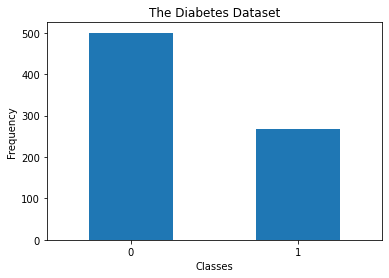

In [50]:
count_classes = pd.value_counts(data['diabetes'], sort = True)

count_classes.plot(kind = 'bar', rot = 0)

plt.xticks(range(2))
 
plt.title("The Diabetes Dataset")

plt.xlabel("Classes")

plt.ylabel("Frequency")

In [51]:
(data_true_counts,data_false_counts)

(268, 500)

In [56]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

##Checking for the missing values in the rows

In [63]:
print("total number of rows : {}".format(len(data)))
print("number of rows missing glucose_conc: {}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [67]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [68]:
##Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state = 10)

random_forest_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [71]:
##Predicting the test data
y_pred = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy :  {0:3f}".format(metrics.accuracy_score(y_test,y_pred)))

Accuracy :  0.753247


In [85]:
##Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [83]:
##Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV
from xgboost import  XGBClassifier

In [95]:
classifier = XGBClassifier()

In [96]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [97]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [98]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [99]:
classifier =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [100]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [101]:
y_predict = classifier.predict(X_test)
print("Accuracy: {0:3f}".format(metrics.accuracy_score(y_test,y_pred)))

Accuracy: 0.753247


In [102]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=10)

In [103]:
score

array([0.71428571, 0.77922078, 0.77922078, 0.68831169, 0.71428571,
       0.76623377, 0.77922078, 0.83116883, 0.72368421, 0.80263158])

In [104]:
score.mean()

0.7578263841421736